# (Dataset Exploration Title)
## by (Abdelrahman Mostafa)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv('data.csv')
print(df.shape)
df.head()

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Data wrangling

### assessing missing values and check if any columns should be dropped

In [3]:
#replace spaces in columns name by _ to facilitate dealing with the dataset 
df.columns= df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unnamed:_0                18207 non-null  int64  
 1   id                        18207 non-null  int64  
 2   name                      18207 non-null  object 
 3   age                       18207 non-null  int64  
 4   photo                     18207 non-null  object 
 5   nationality               18207 non-null  object 
 6   flag                      18207 non-null  object 
 7   overall                   18207 non-null  int64  
 8   potential                 18207 non-null  int64  
 9   club                      17966 non-null  object 
 10  club_logo                 18207 non-null  object 
 11  value                     18207 non-null  object 
 12  wage                      18207 non-null  object 
 13  special                   18207 non-null  int64  
 14  prefer

In [4]:
#drop all of position columns from ls to rb because the data set have position column already
df.position.value_counts()
df.drop(columns=df.columns[28:54],inplace=True)

In [5]:
#the function display the details of columns that have missing value(i've got the function from stackoverflow)
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        #mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        #columns = {0: 'Missing Values', 1 : '% of Total Values'})
        #mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        #mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,2] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 63 columns and 18207 Rows.
There are 50 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
loaned_from,0,16943,93.1,object
release_clause,0,1564,8.6,object
joined,0,1553,8.5,object
contract_valid_until,0,289,1.6,object
club,0,241,1.3,object
position,0,60,0.3,object
jersey_number,0,60,0.3,float64
work_rate,0,48,0.3,object
penalties,0,48,0.3,float64
jumping,0,48,0.3,float64


In [6]:
#drop the column 93% of there values are missing
df.drop(columns=['loaned_from'],inplace=True)

In [7]:
### drop the 48 rows which have missing values in most of significant columns
drop_idx=df[df['vision'].isnull()].index
df.drop(drop_idx,inplace=True)

In [8]:
# drop another 12 rows that have unknown club or position
drop_row=df[df['position'].isnull()].index
df.drop(drop_row,inplace=True)
df.isnull().sum()[5:]



nationality                    0
flag                           0
overall                        0
potential                      0
club                         229
club_logo                      0
value                          0
wage                           0
special                        0
preferred_foot                 0
international_reputation       0
weak_foot                      0
skill_moves                    0
work_rate                      0
body_type                      0
real_face                      0
position                       0
jersey_number                  0
joined                      1493
contract_valid_until         229
height                         0
weight                         0
crossing                       0
finishing                      0
headingaccuracy                0
shortpassing                   0
volleys                        0
dribbling                      0
curve                          0
fkaccuracy                     0
longpassin

### investigate the data nature to grasp what could be significant variable, also invistigate variable types that inconsistent with their nature

In [9]:
df[['name', 'age', 'nationality',
       'overall', 'potential', 'club', 'value', 'wage', 'special',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate']]

,name,age,nationality,overall,potential,club,value,wage,special,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium
18204,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,Right,1.0,3.0,2.0,Medium/ Medium
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,Right,1.0,3.0,2.0,Medium/ Medium


In [10]:
df[['position',
       'height', 'weight', 'crossing', 'finishing', 'headingaccuracy',
       'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy',
       'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed', 'agility',
       'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
       'longshots', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'marking', 'standingtackle', 'slidingtackle',
       ]]

,position,height,weight,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,...,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle
0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,CM,5'9,134lbs,34.0,38.0,40.0,49.0,25.0,42.0,30.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,ST,6'3,170lbs,23.0,52.0,52.0,43.0,36.0,39.0,32.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,ST,5'8,148lbs,25.0,40.0,46.0,38.0,38.0,45.0,38.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,RW,5'10,154lbs,44.0,50.0,39.0,42.0,40.0,51.0,34.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


In [11]:
df[['fkaccuracy',
       'longpassing', 'ballcontrol', 'acceleration', 'sprintspeed', 'agility',
       'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
       'longshots', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'marking', 'standingtackle', 'slidingtackle']]

,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,...,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle
0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0


wage and value need to be appropriate numerical,float or int type, not object type

In [12]:
df= df.rename(columns = {'value': 'value_x', 'wage': 'wage_x'}, inplace = False)

In [13]:
def replaces(col,derived_col):
    for i in col:
        if '.' in i:
            derived_col.append(i.replace('€','').replace('K', '00').replace('M', '00000').replace('.',''))
        else:
            derived_col.append(i.replace('€','').replace('K', '000').replace('M', '000000'))
    return derived_col

In [14]:
value=[]
df['value']=replaces(df['value_x'],value)
wage=[]
df['wage']=replaces(df['wage_x'],wage)

In [15]:
df.value=df['value'].astype(float)
df.wage=df['wage'].astype(float)




> the dataset contains 18,207 rows and 89 columns.most of main features are neumeric and a little significant categorical features exist  



>  wages and value distribution and there relation with other features estimated to be main feature of interest



> many values could be have strong correllation with wage and value like overall,potential and age  , but what is the most corrllated with wage and values that is what exploration is going for

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

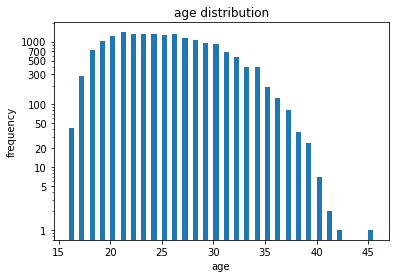

In [100]:
bins=np.arange(df.age.min(),df.age.max()+1,.5)
plt.hist(df['age'],bins=bins)
plt.yscale('log')
plt.yticks([1,5,10,20,50,100,300,500,700,1000],[1,5,10,20,50,100,300,500,700,1000])
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('age distribution')
plt.show()

the age is  skewed , there are outlier have 45 years old ,also it a quite rare when a player exceeds 40 years old, we will investigate later the impact of age on wages 

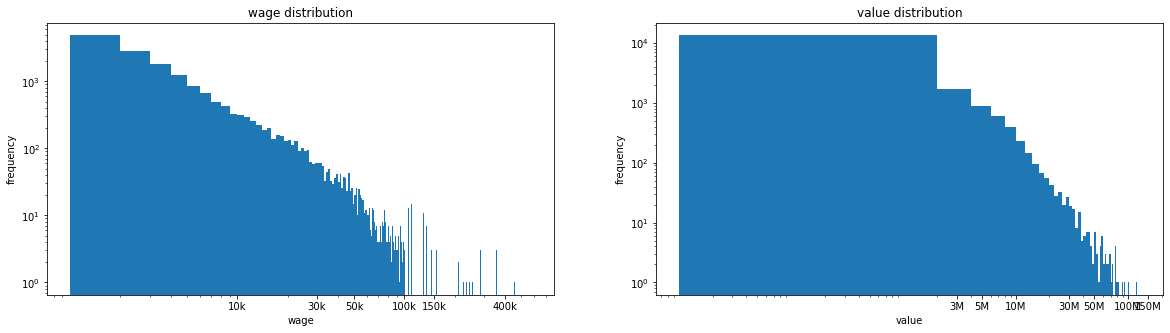

In [102]:
plt.figure(figsize = [20, 5])
plt.subplot(1,2, 1)
df['wage_d']=df['wage']/1000
w_bins = np.arange(df.wage_d.min(), df.wage_d.max()+10,1)
plt.hist(data = df, x = 'wage_d',bins=w_bins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('wage')
plt.title('wage distribution')
plt.ylabel('frequency')
plt.xticks([10, 30, 50,100, 150, 400], ['10k', '30k', '50k', '100k', '150k','400k'])

plt.subplot(1,2, 2)
df['value_d']=df['value']/1000000
v_bins = np.arange(df.value_d.min(), df.value_d.max()+10,2)
plt.hist(data = df, x ='value_d',bins=v_bins)
plt.xscale('log')
plt.yscale('log')
plt.title('value distribution')
plt.xlabel('value')
plt.ylabel('frequency')
plt.xticks([3,5,10, 30, 50,100, 150], ['3M','5M','10M', '30M', '50M', '100M', '150M']);


the wage and value haven't clear interpretation in those graphs, so the graphs need more manipulation

In [18]:
#drop index with 0 wage to take log10 of  wage column
w_outliers = (df['wage'] == 0).values
drop_idx=df.iloc[w_outliers,:].index
df.drop(drop_idx,inplace=True)

In [19]:
np.log10(df.wage_d.describe())

count    4.253290
mean     0.994922
std      1.345232
min      0.000000
25%      0.000000
50%      0.477121
75%      0.954243
max      2.752048
Name: wage_d, dtype: float64

<Figure size 1296x1080 with 0 Axes>

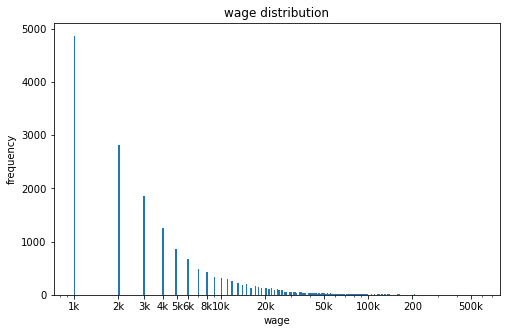

In [106]:
plt.figure(figsize = [18, 15])
log_binsize = 0.01
bins = 10 ** np.arange(np.log10(df['wage_d'].min()), np.log10(df['wage_d'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'wage_d', bins = bins)
#w2_bins = 10 ** np.arange(1, 3, 0.03)
#plt.hist(data = df, x = 'wage_d',bins=w2_bins)
plt.xscale('log')
plt.xlabel('wage')
plt.ylabel('frequency')
plt.xticks([1,2,3,4,5,6,8,10,20,50,100,200, 500], ['1k','2k','3k','4k','5k','6k','8k','10k','20k','50k','100k','200','500k',])
plt.title('wage distribution')
plt.show()


the wages is purely skewed , i'll perform extra manipulation to see the relation clearer 

<Figure size 1584x1080 with 0 Axes>

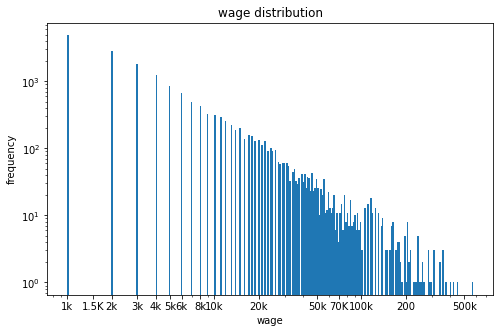

In [108]:
plt.figure(figsize = [22, 15])
log_binsize = 0.01
bins = 10 ** np.arange(np.log10(df['wage'].min()), np.log10(df['wage'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'wage', bins = bins)
plt.xscale('log')
plt.xticks([1e3,15e2,2e3,3e3,4e3,5e3,6e3,8e3,10e3,20e3,50e3,70e3,100e3,200e3, 500e3], ['1k','1.5K','2k','3k','4k','5k','6k','8k','10k','20k','50k','70K','100k','200','500k',])
plt.xlabel('wage')
plt.ylabel('frequency')
plt.title('wage distribution')
plt.yscale('log');

the wages amount have linear negative relation with frequency but have some spikes after 50K , interesingly most of playesrs' wags increase by xK without any fractions , even in the small wages, the player get 1k ,2k or 3k..etc no player get 1.5k or 2.5k despite of the increas by those fractions is relatively high portion for player who get below 7k
.i don't know why such an increase,fraction increas,is not exist like other jobs' wages, maybe that a traditional in soccer

In [22]:
df.value.describe()

count    1.791800e+04
mean     2.448629e+06
std      5.631804e+06
min      0.000000e+00
25%      3.250000e+05
50%      7.000000e+05
75%      2.100000e+06
max      1.185000e+08
Name: value, dtype: float64

In [23]:
#drop index that have 0 in column value
v_outliers = (df['value'] == 0).values
drop_vidx=df.iloc[v_outliers,:].index
df.drop(drop_vidx,inplace=True)

In [24]:
"""the following function transform the large number of xticks to more readable xlable, it takes two aurgment, first the list of 
xticks and the second one is a list that you want to store the label in it
the function have many limitation ,values from 1e6 to 9e6 should be written like this int(x) also the function range
from 1K to 100M,the function deal with fraction only in range from 1M to 9M , the function designed specifically for values in
wage and value columns not for general use"""
def axis_labels(tick_list,tick_label):
    for i in tick_list:
        if '.' in str(i) and len(str(i))==9:
            z=str(int(str(i)[:2]))
            x=z[0]+'.'+z[1]+'M'
            tick_label.append(x)
        elif len(str(int(i)))==4:
            z=str(int(str(i)[:1]))
            x=z+'k'
            tick_label.append(x)
        elif len(str(int(i)))==5:
            z=str(int(str(i)[:2]))
            x=z+'k'
            tick_label.append(x)
        elif len(str(int(i)))==6:
            z=str(int(str(i)[:3]))
            x=z+'k'
            tick_label.append(x)
        elif len(str(int(i)))==7:
            z=str(int(str(i)[:1]))
            x=z+'M'
            tick_label.append(x)
        elif len(str(int(i)))==8:
            z=str(int(str(i)[:2]))
            x=z+'M'
            tick_label.append(x)
        elif len(str(int(i)))==9:
            z=str(int(str(i)[:3]))
            x=z+'M'
            tick_label.append(x)
        
    return tick_label


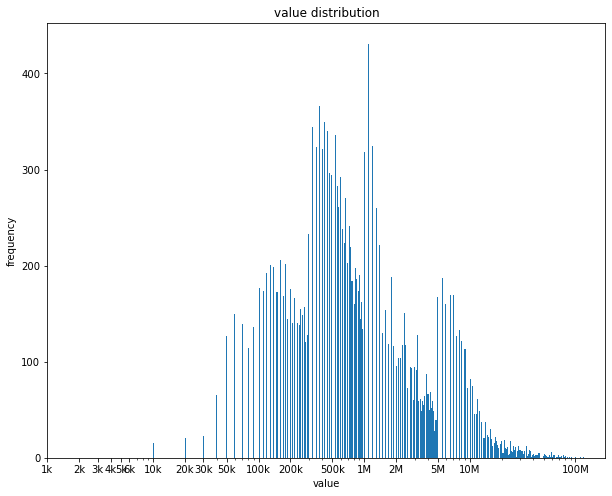

In [109]:
plt.figure(figsize = [10, 8])
log_binsize = 0.01
bins = 10 ** np.arange(np.log10(df['value'].min()), np.log10(df['value'].max())+log_binsize, log_binsize)
plt.hist(data = df, x = 'value', bins = bins)
xticks=[1e3,2e3,3e3,4e3,5e3,6e3,10e3,20e3,30e3,50e3,100e3,200e3,500e3,int(1e6),int(2e6),int(5e6),10e6,100e6]
tick_label=[]
plt.xscale('log')
plt.ylabel('count')
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('value distribution')
plt.xticks(xticks,axis_labels(xticks,tick_label))
plt.show()

the plot shows interesting patterns in value frequency, it's unlike wage frequency as it shows linear relation in frequency, the plot could be separated into multiple intervals,specifically form 100K to 100M,there are a pattern in skewness for values from 100K to 100M 
i'll focuse more in those values

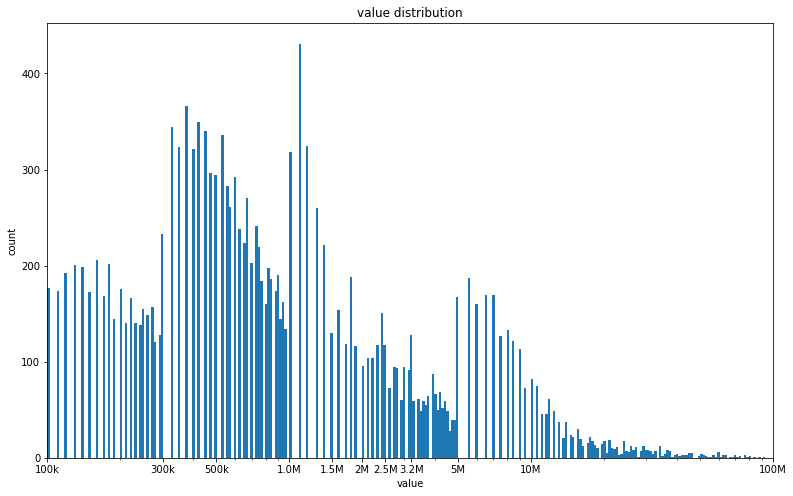

In [110]:
plt.figure(figsize = [13, 8])
#plt.subplot(1,2, 1)
#df['wage_d']=df['wage']/1000
log_binsize = 0.01
bins = 10 ** np.arange(np.log10(df['value'].min()), np.log10(df['value'].max())+log_binsize, log_binsize)
plt.hist(data = df, x = 'value', bins = bins)
#w2_bins = 10 ** np.arange(1, 3, 0.03)
#plt.hist(data = df, x = 'wage_d',bins=w2_bins)
xticks=[1e3,2e3,3e3,4e3,5e3,6e3,10e3,20e3,30e3,50e3,100e3,300e3,500e3,1000e3,1.5e6,int(2000e3),2.5e6,3.2e6,int(5000e3),10000e3,100000e3]
tick_label=[]
plt.xscale('log')
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('value distribution')
plt.xticks(xticks,axis_labels(xticks,tick_label))
plt.ylabel('count')
plt.xlim(100e3,100e6);



the frequency have spikes around 3.25K ,1M ,3.2M and 5M after each of those spikes the frequency decayed until the next spike
next i'll investigate some feature to grasp the common distribution among features  

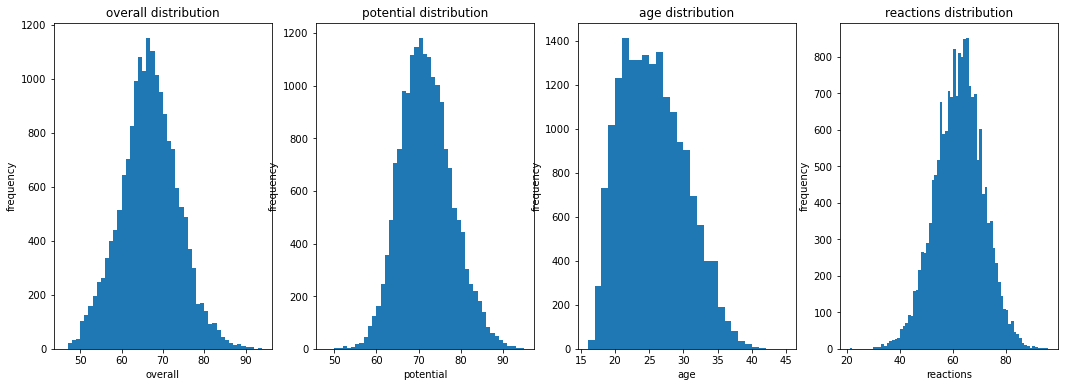

In [113]:
fig, ax = plt.subplots(ncols = 4, figsize = [18,6])
variables = ['overall', 'potential','age','reactions']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df[var]), max(df[var])+1,1)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('{}'.format('frequency'))
    ax[i].set_title('{}'.format(var+' '+'distribution'))

#ncols = 2, nrows = 3 
#ax[i,0]

those for features appears normaly distributed lets consider another feature to see that distribution is common or not

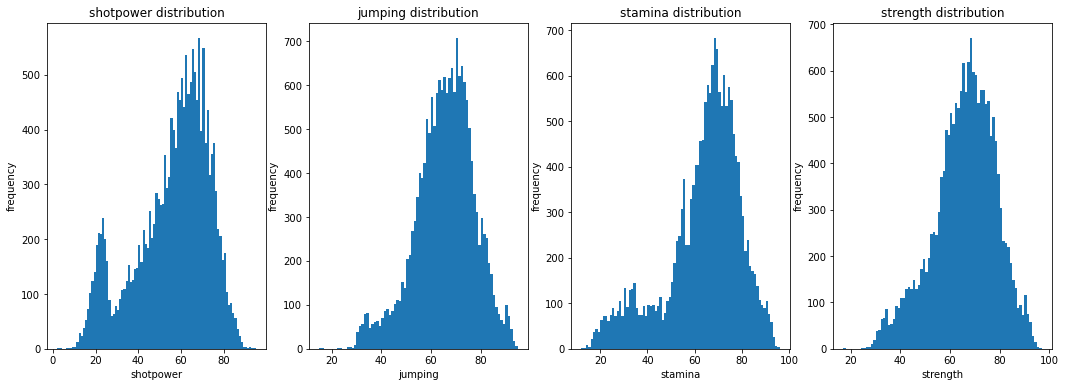

In [114]:
fig, ax = plt.subplots(ncols = 4, figsize = [18,6])
variables = ['shotpower', 'jumping', 'stamina', 'strength']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df[var]), max(df[var])+1,1)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('{}'.format('frequency'))
    ax[i].set_title('{}'.format(var+' '+'distribution'))

looks like most of features are normally distributed, with a little skewness,
later in bivariate exploration  i'll consider top 10 features have highest relation with wage

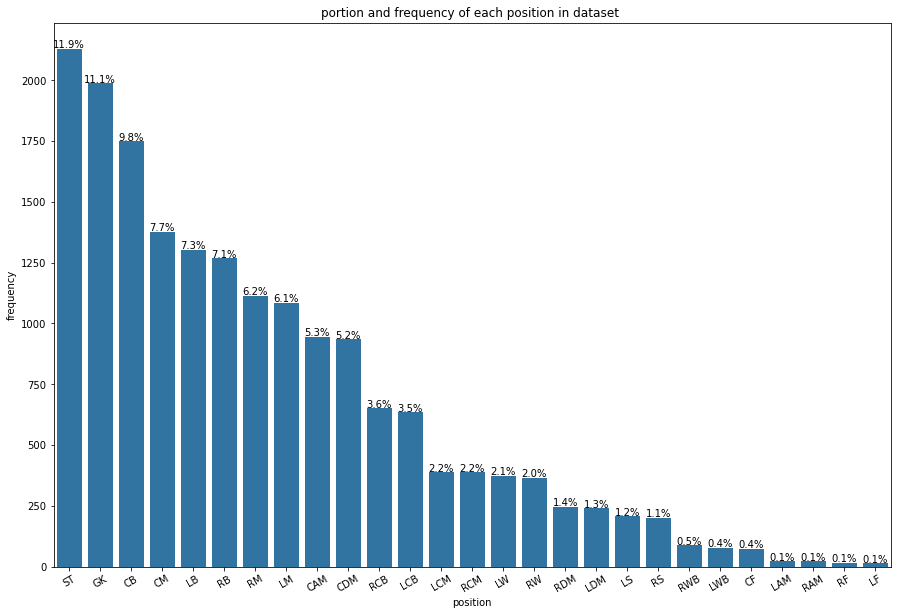

In [118]:
#lets invistigate the most common positions
sum_ratio=0
n_positon=df.position.value_counts().sum()
type_counts=df.position.value_counts()
type_order=type_counts.index
base_color=sb.color_palette()[0]
plt.figure(figsize=[15,10])
plt.xticks(rotation=30) 
sb.countplot(data=df,x='position',color=base_color,order=type_order)
plt.title('portion and frequency of each position in dataset ')
plt.ylabel ('frequency')
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_positon)
    sum_ratio+=(100*count/n_positon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(i,count+15, pct_string, horizontalalignment='center',verticalalignment='center');

the figure display the players positions frequency,
while the football team needs just one GK in that position during the matches, surprisingly the GK is 2nd in most common positions(arround 11% of players are GK), later on bivariate i'll investigate the position frequency impact on player wage, i expected the lower position frequency tend to get higher wage and have higher value, next i'll investigate preferred foot frequency

Text(0, 0.5, 'freq')

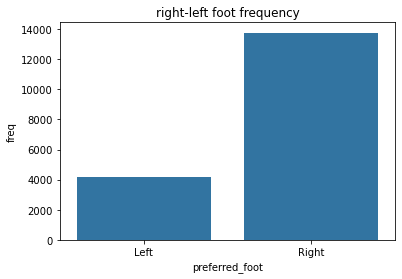

In [119]:
#even it's logically the right foot is more common among players but i'll investigate how much the frequency differ
default_color = sb.color_palette()[0]
sb.countplot(data =df , x = 'preferred_foot', color = default_color)
plt.title('right-left foot frequency')
plt.ylabel('freq')

 because the left foot frequency is reltively rare compared to right foot.
 is that, left foot rarity, have any positive impact on player wage ?
 


> most of variable of intrest is normally distributed with alittle skewness except values and wages ,there distributon is right skewed,i needed to work on log  scale when the plot have wages or value columns to display meaningful plot

> the distribution of value are interesting , unlike wages distribution that haven't any  considrable spikes, the distribution of values have repeated pattern after each spike
i need to transform wgae and value column from object type to float type, that take some manipulation to remove characters from values 

## Bivariate Exploration


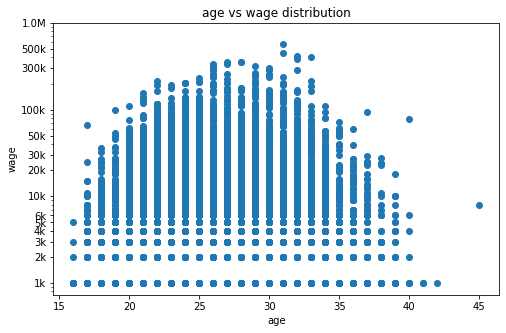

In [120]:
plt.figure(figsize = [8, 5])
plt.scatter(data = df, x = 'age', y = 'wage')
plt.xlabel('age')
plt.ylabel('wage')
yticks=[1e3,2e3,3e3,4e3,5e3,6e3,10e3,20e3,30e3,50e3,100e3,300e3,500e3,1000e3]
tick_label=[]
plt.yscale('log')
plt.yticks(yticks,axis_labels(yticks,tick_label))
plt.title('age vs wage distribution')
plt.show()

the age vs wags looks normally distributed ,the wage increase with age increase until 30 yeras old,the wage starts to decay, t but for wages below 6K there are no influence of age , in other words wages below 6K not affected by player age , next i'll investigare features vs wage correlation

In [32]:
#invistigate features correlation with wage
inter_val=df.columns[np.r_[3,7:9,11:13,27:64]]
df[inter_val].corr()['wage'].sort_values(ascending=False)

wage               1.000000
value              0.858037
overall            0.576098
reactions          0.499680
potential          0.489289
composure          0.423442
vision             0.317189
shortpassing       0.298721
ballcontrol        0.279073
longpassing        0.278984
curve              0.260699
shotpower          0.260006
volleys            0.258938
longshots          0.250729
dribbling          0.238106
fkaccuracy         0.237839
crossing           0.234479
positioning        0.227772
penalties          0.224564
finishing          0.218599
aggression         0.196091
headingaccuracy    0.189672
stamina            0.179223
interceptions      0.158868
agility            0.156779
marking            0.147392
age                0.145075
strength           0.140096
sprintspeed        0.131196
jumping            0.129376
standingtackle     0.127667
acceleration       0.125986
slidingtackle      0.112350
balance            0.089480
gkhandling        -0.024709
gkpositioning     -0

### i'll consider the tope 10 correlated variable with player wage and see how this variable corrlated with each other 

In [33]:
#select top 10 features correlated with wage
heatmap_val=df[inter_val].corr()['wage'].sort_values(ascending=False).index[:10]

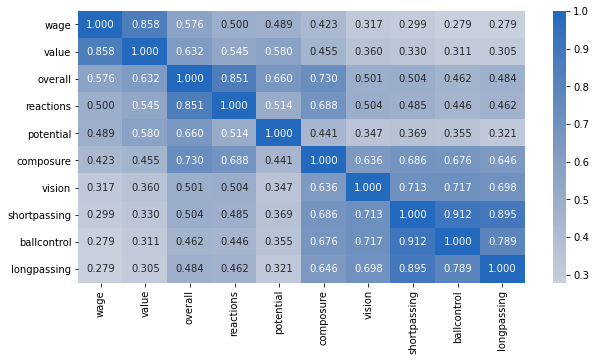

In [34]:
plt.figure(figsize = [10, 5])
sb.heatmap(df[heatmap_val].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

we could see many strong positive correlation between variables like (shortpassing vs ballcontrol) and (shortpassing,vision)
but interesingly the strong positive correlation between Composure and overall , furthermore the Composure have moderate positive correlation with most of variables in the heatmap,Composure in football is one's ability to perform well under pressure, so it's psychological aspect not related to any technical aspect, i'll investigate relation deeper between high correlated feature

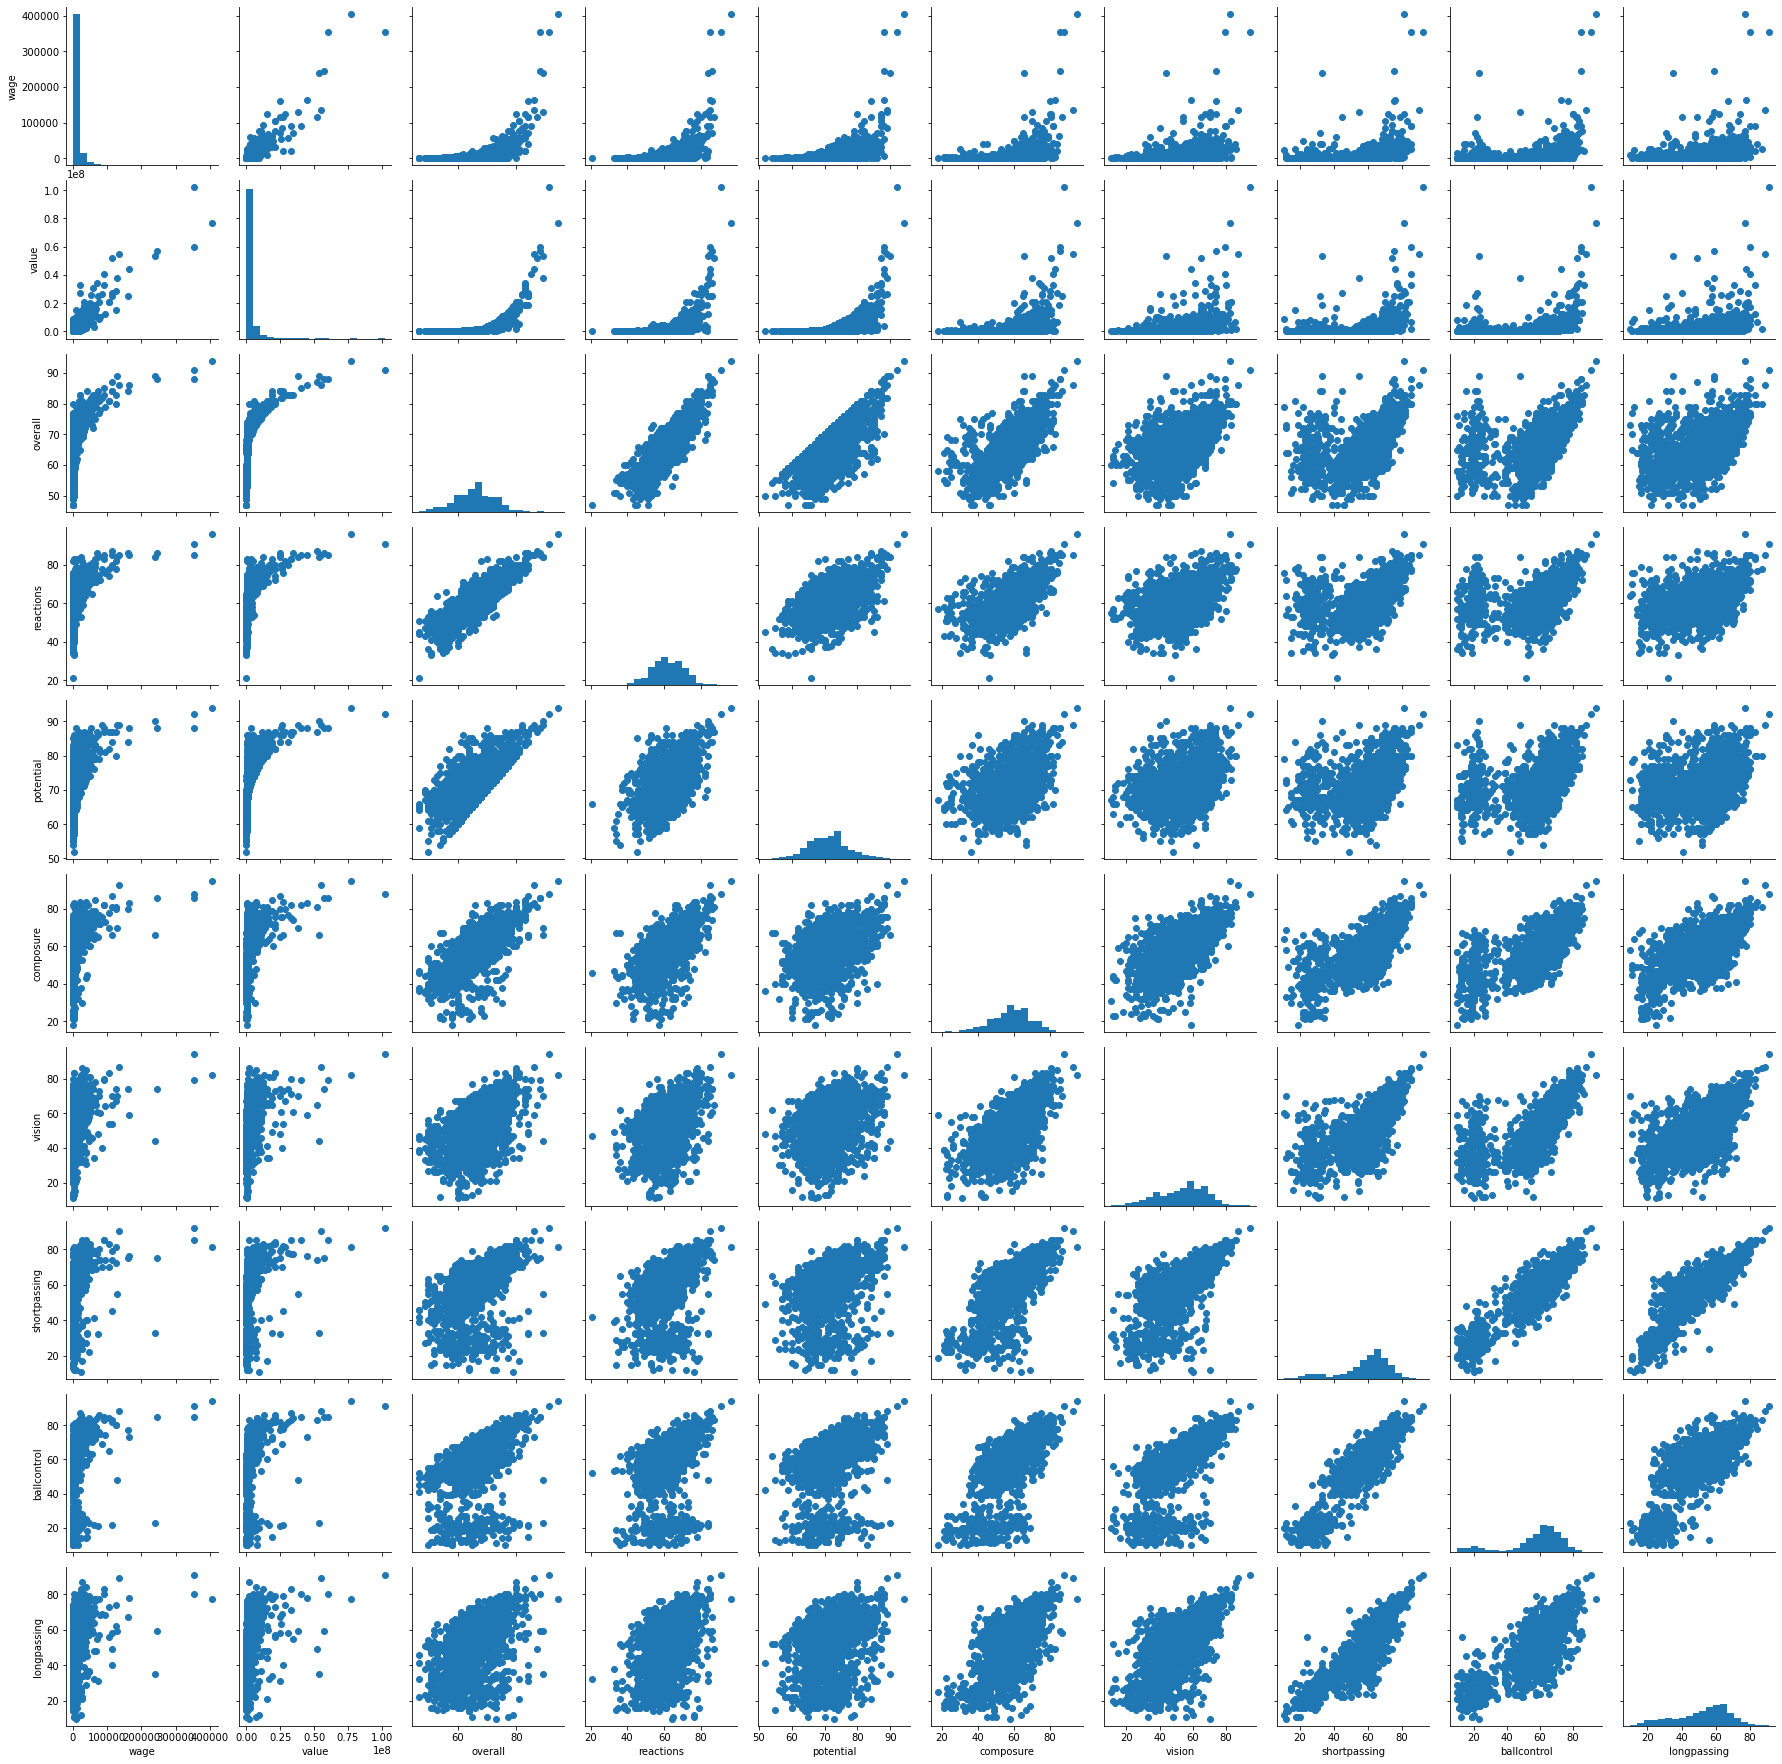

In [35]:
#investigate the common shapes among the top 10 features with each other
samples = np.random.choice(df.shape[0], 1500, replace = False)
df_samp = df.iloc[samples,:]

g = sb.PairGrid(data = df_samp, vars = heatmap_val)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

most of features have positive relation with each other with diversity of correlation,i'll investigate some linear plots in more details to see shapes more closely 

Text(0.5, 1.0, 'ovrall vs vision')

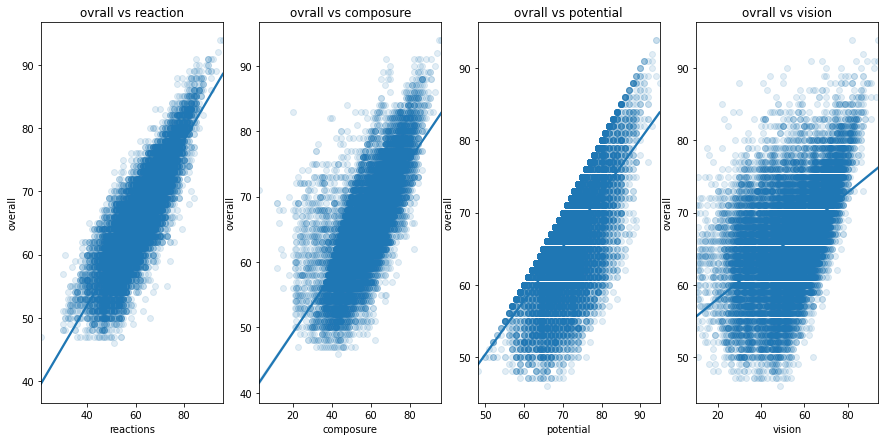

In [121]:
plt.figure(figsize = [15, 7])
plt.subplot(1, 4, 1)
sb.regplot(data = df, x = 'reactions', y = 'overall', scatter_kws={'alpha':1/8})
plt.title('ovrall vs reaction')
plt.subplot(1, 4, 2)
sb.regplot(data = df, x = 'composure', y = 'overall', scatter_kws={'alpha':1/8})
plt.title('ovrall vs composure')
plt.subplot(1, 4, 3)
sb.regplot(data = df, x = 'potential', y = 'overall', scatter_kws={'alpha':1/8})
plt.title('ovrall vs potential')
plt.subplot(1, 4, 4)
sb.regplot(data = df, x = 'vision', y = 'overall', scatter_kws={'alpha':1/8})
plt.title('ovrall vs vision')


while reaction is the most feature correlated with overall, interestingly composure,psychological aspect not related to any technical aspect, is the second one and we could see these advantage over feature expected to be more correlated with overall, to assure that hypothesis,i'll invistigate the top 10 feature  mean correlation with other feature ,i'want to see which features that tend to affect the others mostly .in other words wich features have better indication to the value of other features 

In [37]:
#for example i'll take the mean of correlation of each column and see which is highest one
int_fea=df.columns[np.r_[7,8,27:56]]
df[int_fea].corr()[['overall','composure','ballcontrol','reactions']]

,overall,composure,ballcontrol,reactions
overall,1.000000,0.730493,0.461843,0.851197
potential,0.660409,0.440876,0.354508,0.513610
crossing,0.395789,0.576182,0.840982,0.390340
finishing,0.333418,0.533955,0.788052,0.332555
headingaccuracy,0.341893,0.508776,0.658653,0.328480
shortpassing,0.503737,0.686365,0.911966,0.484758
volleys,0.391757,0.595774,0.794615,0.394850
dribbling,0.373663,0.598783,0.938977,0.370768
curve,0.420303,0.617105,0.829403,0.414080
fkaccuracy,0.397839,0.585585,0.759303,0.398781


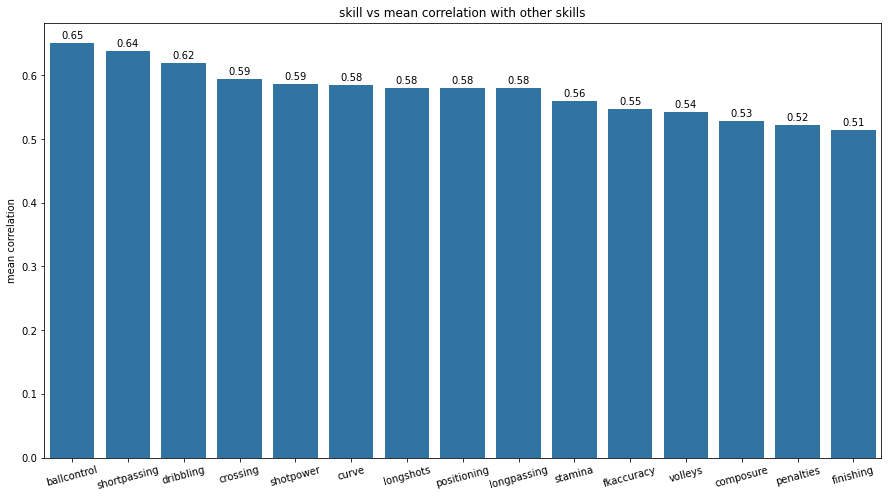

In [122]:
int_fea=df.columns[np.r_[7,8,27:56]]
corr_mean=df[int_fea].corr().mean().sort_values(ascending=False)[:15]
plt.figure(figsize=[15,8])
base_color=sb.color_palette()[0]
type_counts=corr_mean
type_order=type_counts.index
sb.barplot(x=corr_mean.index,y=corr_mean,color=base_color,order=type_order)
plt.title('skill vs mean correlation with other skills');
plt.ylabel('mean correlation')
plt.xticks(rotation=15)
for i in range(corr_mean.shape[0]):
    count=corr_mean[i]
    pct_string = '{:0.2f}'.format(count)
    plt.text(i,count+.02,pct_string, ha = 'center',va='top')
    plt.ylabel('mean correlation')
    

*the figure shows us that ballcontrol have highest mean correlation among all features, that's mean when a player  have high score in ball control  that's mean he expected to have high score in most of other features . that's reject tha last hypothesis of composure ,and i'll focuse more on ball control and there relations*

*composure still relatively have high correlation with other features among 31 investigated features*

*i'll investigate the relation between wage ,value, overall and ballcontrol deeper to see the common shape of relation between wage and those features*

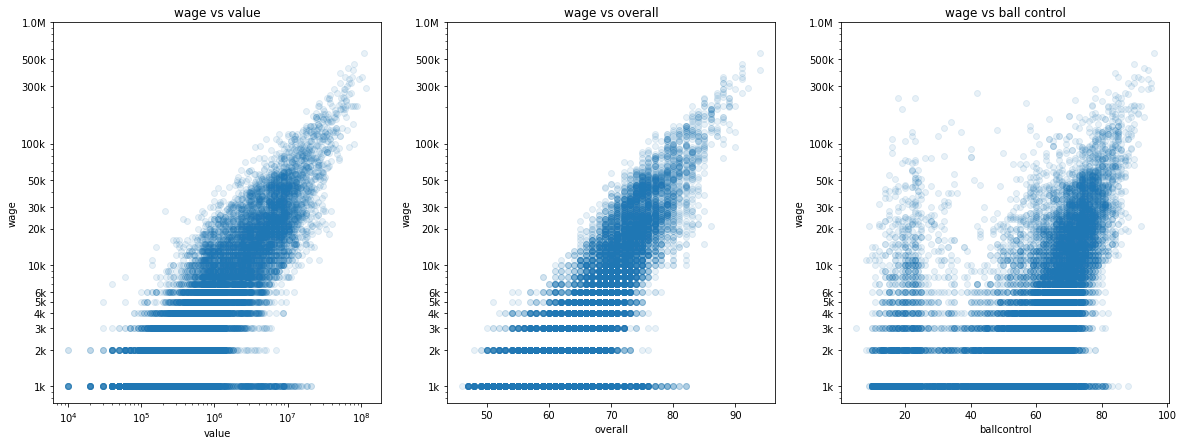

In [134]:
#plot wage vs values and overall to see deeper insight of the relation
plt.figure(figsize = [20, 7])
plt.subplot(1, 3, 1)
plt.scatter(data = df, x = 'value', y = 'wage', alpha = 1/10)
plt.xlabel('value')
plt.xscale('log')
plt.ylabel('wage')
yticks=[1e3,2e3,3e3,4e3,5e3,6e3,10e3,20e3,30e3,50e3,100e3,300e3,500e3,1000e3]
tick_label=[]
plt.yscale('log')
plt.title('wage vs value')
plt.yticks(yticks,axis_labels(yticks,tick_label));
plt.subplot(1, 3, 2)
plt.scatter(data = df, x = 'overall', y = 'wage', alpha = 1/10)
plt.xlabel('overall')
plt.ylabel('wage')
plt.title('wage vs overall')
yticks=[1e3,2e3,3e3,4e3,5e3,6e3,10e3,20e3,30e3,50e3,100e3,300e3,500e3,1000e3]
tick_label=[]
plt.yscale('log')
plt.yticks(yticks,axis_labels(yticks,tick_label));
plt.subplot(1, 3, 3)
plt.scatter(data = df, x = 'ballcontrol', y = 'wage', alpha = 1/10)
plt.xlabel('ballcontrol')
plt.ylabel('wage')
plt.title('wage vs ball control')
yticks=[1e3,2e3,3e3,4e3,5e3,6e3,10e3,20e3,30e3,50e3,100e3,300e3,500e3,1000e3]
tick_label=[]
plt.yscale('log')
plt.yticks(yticks,axis_labels(yticks,tick_label));


*the shape of relation between features and wage repeated, there are interesting point, for wages below 10K there are approximatly no influence on wages by a wide range in feature (overall,ballcontrol and value) in contrast for high wages there are huge influence by feature increases, surprisingly there are players' values excedd 10M but there wages is just 1K,the relation is quite unfair for many players have high skills and get too little wages, wages may be rely more on the club or legue country than skills, the next cell i'll check that hypothesis*

*next i'll investigate the influence of categorical variables (international reputation,weak foot,skill moves and positions)*

In [73]:
#the 20 lowest clubs in mean wage 
club_avg_wag=df.groupby(['club'])['wage'].mean().sort_values()[:20].reset_index(name='mean wage')
clud_std_wage=df.groupby(['club'])['wage'].std().sort_values()[:20].reset_index(name='std')
club_std_avg=club_avg_wag.merge(clud_std_wage, how='inner', on='club')
club_std_avg

,club,mean wage,std
0,Sparta Praha,1000.0,0.0
1,Sligo Rovers,1000.0,0.0
2,Shamrock Rovers,1000.0,0.0
3,Shakhtar Donetsk,1000.0,0.0
4,IF Brommapojkarna,1000.0,0.0
5,IK Sirius,1000.0,0.0
6,SK Slavia Praha,1000.0,0.0
7,Itagüí Leones FC,1000.0,0.0
8,Jaguares de Córdoba,1000.0,0.0
9,Kaizer Chiefs,1000.0,0.0


the previous df interpret why wage vs other features looks constant in low wags and support my hypothesis,
there are clubs haven't any wage variance in wages , all of players get the same wages, that's happen in poor clubs only

In [40]:
#investigate the nature of the categorical variable
df.head(5)[['name','international_reputation','weak_foot','skill_moves']]

,name,international_reputation,weak_foot,skill_moves
0,L. Messi,5.0,4.0,4.0
1,Cristiano Ronaldo,5.0,4.0,5.0
2,Neymar Jr,5.0,5.0,5.0
3,De Gea,4.0,3.0,1.0
4,K. De Bruyne,4.0,5.0,4.0


In [41]:
df[['international_reputation','weak_foot','skill_moves']].dtypes

international_reputation    float64
weak_foot                   float64
skill_moves                 float64
dtype: object

In [42]:
#the variables should be transformed to be ordinal 
ordinal_var=['international_reputation','weak_foot','skill_moves']
for var in ordinal_var:
    df.loc[df[var] == 1, var] = 'E'
    df.loc[df[var] == 2, var] = 'D'
    df.loc[df[var] == 3, var] = 'C'
    df.loc[df[var] == 4, var] = 'B'
    df.loc[df[var] == 5, var] = 'A'

In [43]:
ordinal_var_dict = {'international_reputation': ['E','D','C','B','A'],
                    'weak_foot':  ['E','D','C','B','A'],
                    'skill_moves': ['E','D','C','B','A']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [44]:
df[['international_reputation','weak_foot','skill_moves']].dtypes

international_reputation    category
weak_foot                   category
skill_moves                 category
dtype: object

<Figure size 576x576 with 0 Axes>

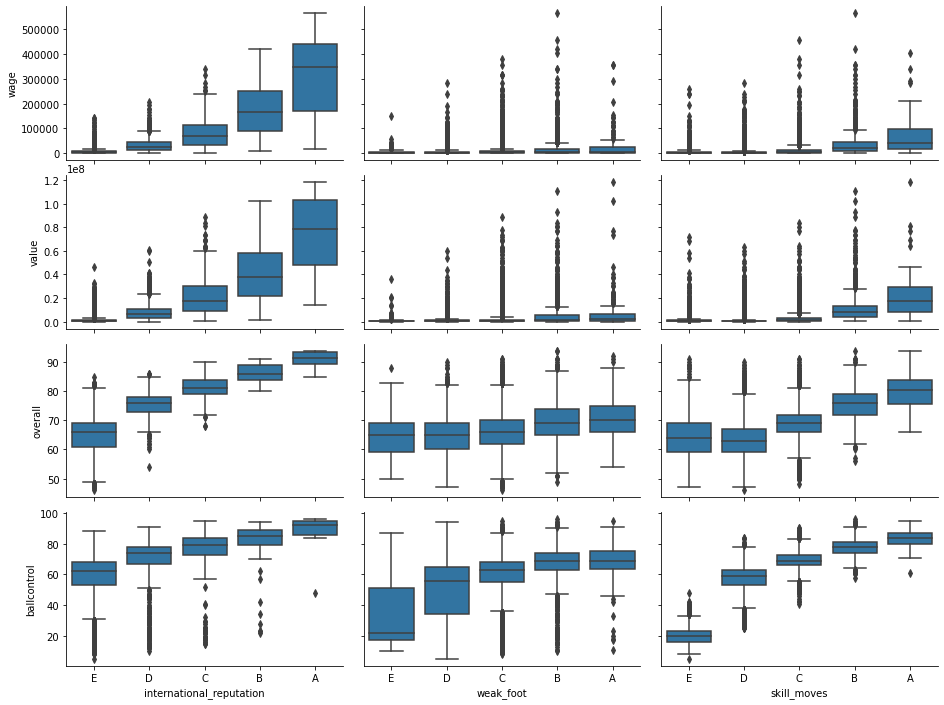

In [45]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,8])
g = sb.PairGrid(data = df, x_vars = ordinal_var,
                y_vars = ['wage','value','overall','ballcontrol'],height=2.5,aspect=1.75)
g.map(sb.boxplot, color = base_color)

*international reputation have huge influence on the significant features like wage and value ,also players have high class reputation are expected to highly skilled in other features, also skill moves have noticeable positive impact on those features specifically ball control*

*week foot haven't considrable influence on wage,value and overall but have noticeable influence on ball control ,it needs deeper investigation to see there influence on other features*

*ballcontrol and overall appears to be related in high manner i'll investigate this relation next*

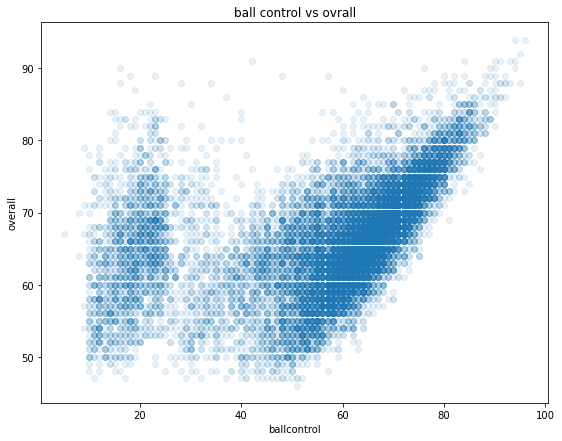

In [124]:
plt.figure(figsize = [20, 7])
plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'ballcontrol', y = 'overall', alpha = 1/10)
plt.xlabel('ballcontrol')
plt.ylabel('overall')
plt.title('ball control vs ovrall');

*the relation shows a high correlation but after the ball control exceed 40*
*i'll display that relation more clearer*

Text(0, 0.5, 'mean overall')

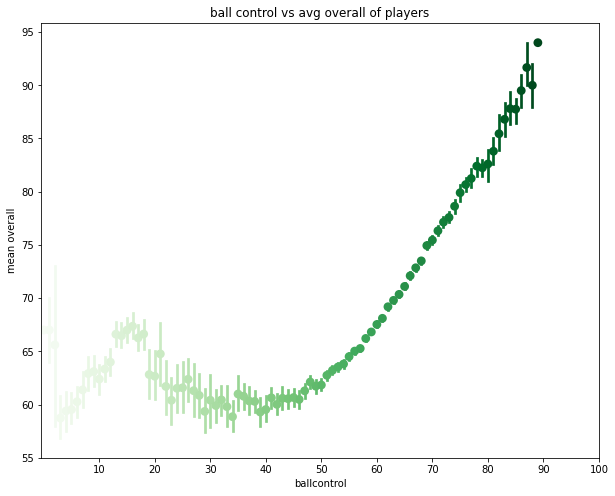

In [47]:
plt.figure(figsize=[10,8])
sb.pointplot(data = df, x = 'ballcontrol', y = 'overall', linestyles = '',dodge = 0.4,palette = 'Greens')
plt.title("ball control vs avg overall of players")
xticks=[10,20,30,40,50,60,70,80,90,100]
plt.xticks(xticks,xticks)
plt.ylabel("mean overall")


*the breaking point of ball control looks clearer in that plot*
*next i'll investiagte another categorical type,player position, and see what influence could be investigated

Text(0.5, 1.0, ' mean wage for each position ')

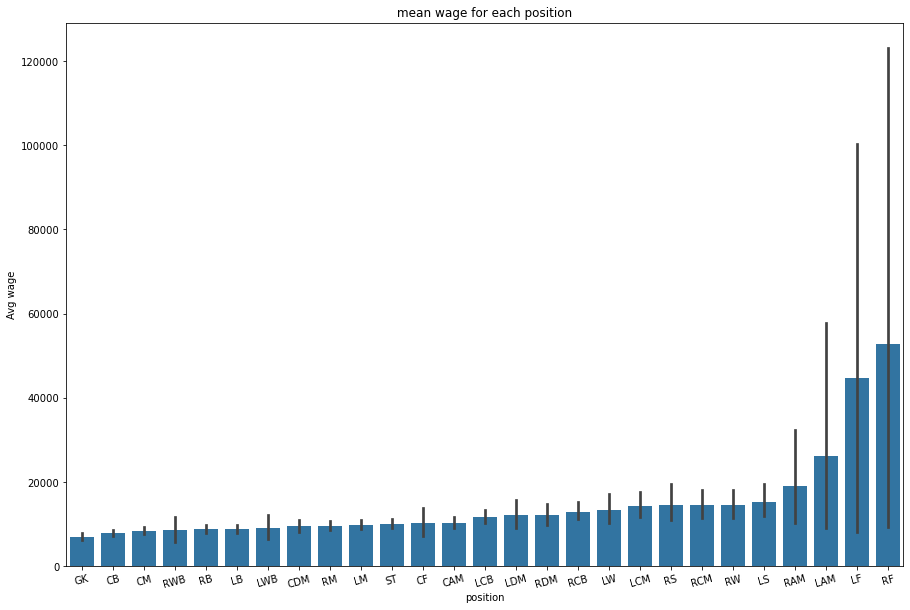

In [127]:
type_counts=df.groupby(['position'])['wage'].mean().sort_values()
type_order=type_counts.index
plt.figure(figsize=[15,10])
sb.barplot(data=df, x='position', y='wage', color=base_color,order=type_order)
plt.xticks(rotation=15);
plt.ylabel('Avg wage')
plt.title(' mean wage for each position ')

back to position frequency plot, it's clear to see the rarity of frquency have considrable positive effect on wage

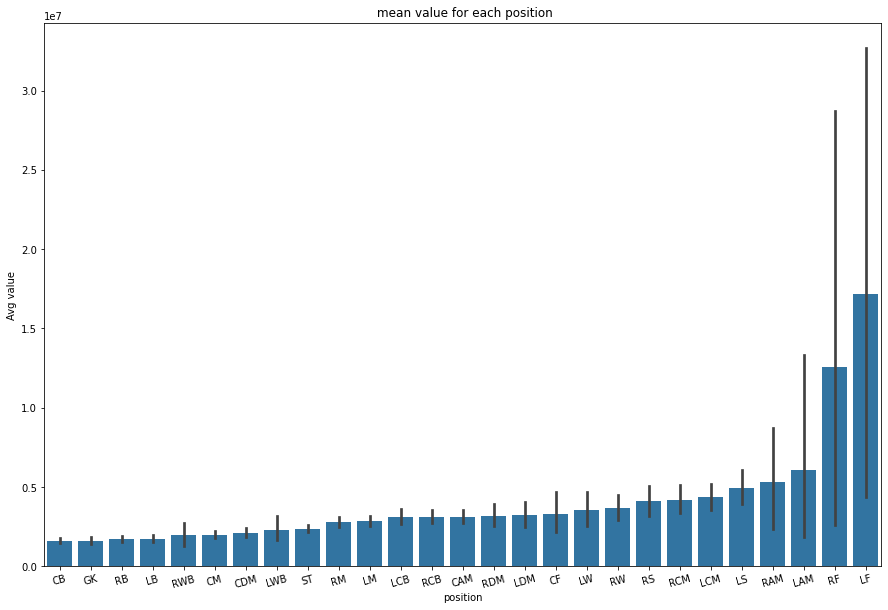

In [126]:
type_counts=df.groupby(['position'])['value'].mean().sort_values()
type_order=type_counts.index
plt.figure(figsize=[15,10])
sb.barplot(data=df, x='position', y='value', color=base_color,order=type_order)
plt.xticks(rotation=15);
plt.ylabel('Avg value')
plt.title(' mean value for each position');

like the previous plot,more position avalability tend to get lower value and wage

In [50]:
count_pos=df.groupby(['position']).size().reset_index(name='pos_count')
pos_avg_wage=df.groupby(['position'])['wage'].mean().reset_index(name='wage_mean')
df_pos=count_pos.merge(pos_avg_wage, how='inner', on='position')
df_pos

,position,pos_count,wage_mean
0,CAM,946,10349.894292
1,CB,1751,7812.107367
2,CDM,936,9434.829060
3,CF,74,10216.216216
4,CM,1377,8443.718228
5,GK,1989,6925.590749
6,LAM,21,26142.857143
7,LB,1304,8845.092025
8,LCB,635,11730.708661
9,LCM,389,14349.614396


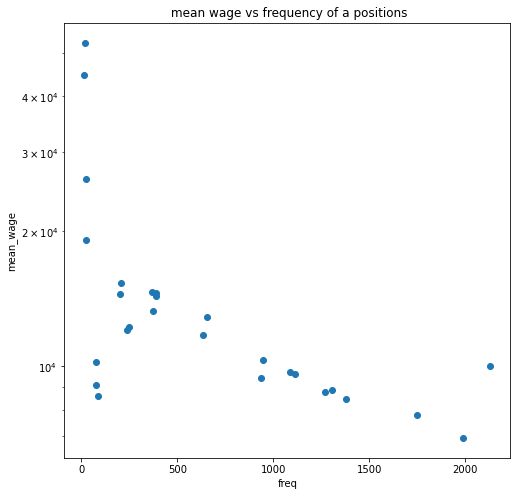

In [129]:
plt.figure(figsize=[8,8])
plt.scatter(data = df_pos, x = 'pos_count', y = 'wage_mean')
plt.xlabel('freq')
plt.ylabel('mean_wage')
plt.title(' mean wage vs frequency of a positions')
plt.yscale('log')


 *that plot shows relation between position frequency vs mean wage for positions, the relation looks linear with few outlaier, but the correlation arround -5, that's support the previous concept, position avalability have big impact on player wags*
*may be tha rare position is haighly skilled ?, that's need more investigation

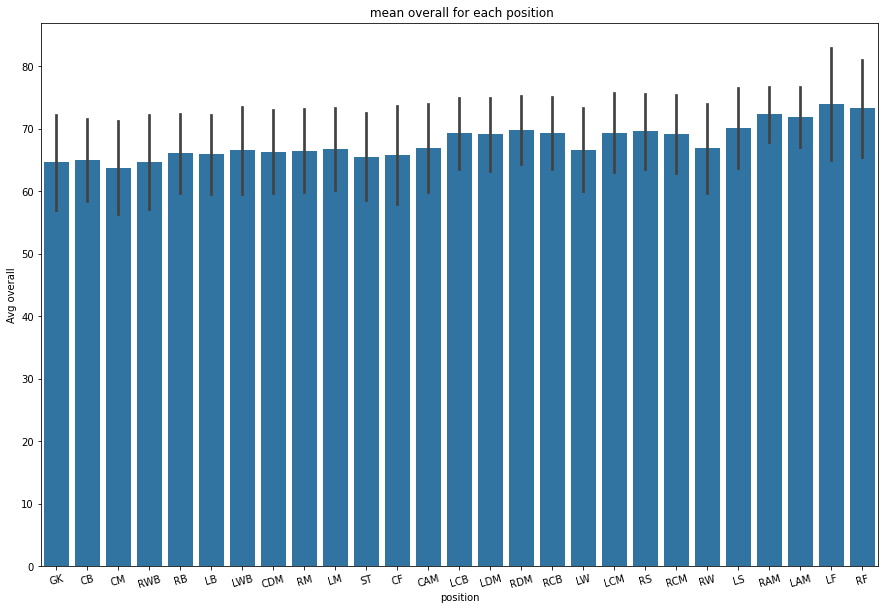

In [130]:
#i'll plot the bars by the previous order to the the variance between over all in the same order of values
plt.figure(figsize=[15,10])
sb.barplot(data=df, x='position', y='overall', color=base_color,ci='sd',order=type_order)
plt.xticks(rotation=15)
plt.ylabel('Avg overall')
plt.title(' mean overall for each position');

*the figure shows that players with rare position frequency are highly skilled than player with high position frequency, but the variance in skills  is small compared to wage variance among player positions

are *some positions like RF,LF get the highest skills in the game and these positions have highest wages in the game* 

*next i'll investiget the reputation class counts in each position*

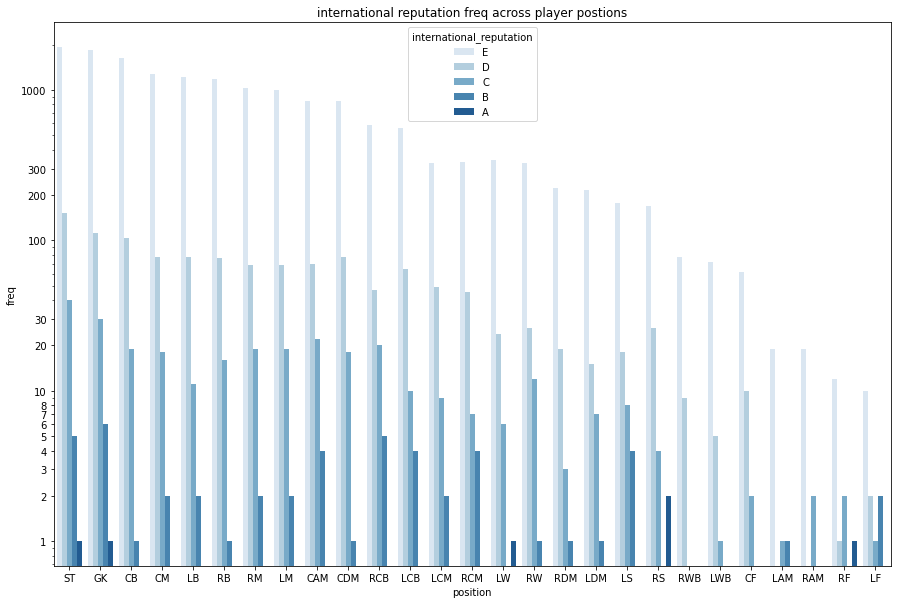

In [133]:
type_counts=df.position.value_counts()
type_order=type_counts.index
plt.figure(figsize=[15,10])
sb.countplot(data = df, x = 'position', hue = 'international_reputation', palette = 'Blues',order=type_order)
plt.yscale('log')
yticks=[1,2,3,4,5,6,7,8,10,20,30,100,200,300,1000]
plt.title('international reputation freq across player postions')
plt.ylabel('freq')
plt.yticks(yticks,yticks);


the plot try to depict position influence on international reputation, as we see most of position have low portion of high reputation class , the only position have reasonabl portion of high reputation class is LF position, LF is the rarest position on dataset and it's become reasonable now form the last two graphs

> most of features are related to each other in some how, but there are strong relation between wages above 10K and other skills, also international reputation have high positive impact on wage, another feature have positive impact on wages the position rarity

> interestingly there are players have huge value and too litte wage, i think the case existing in relatively small or poor clubs, also while football matchs needs only one GK, GK frequency is 2nd in highest frequencies among player positions

## Multivariate Exploration


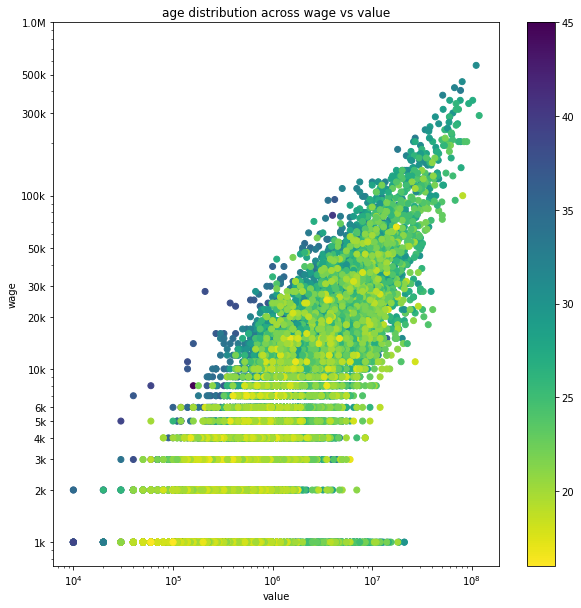

In [132]:
plt.figure(figsize = [10, 10])
plt.scatter(data = df, x = 'value', y = 'wage',c='age',cmap='viridis_r')
plt.colorbar()
plt.xlabel('value')
plt.xscale('log')
plt.ylabel('wage')
yticks=[1e3,2e3,3e3,4e3,5e3,6e3,10e3,20e3,30e3,50e3,100e3,300e3,500e3,1000e3]
tick_label=[]
plt.yscale('log')
plt.yticks(yticks,axis_labels(yticks,tick_label))
plt.title('age distribution across wage vs value')
plt.show()

*the plot display the age distribution in value wage relation, players with high value and low wage tend to be young players,while people with highest wages and value tend to be arround 30 years old, but this decribtion is not the case in many points*

*next i'll investigate the relations among the categorical variables to see if any interesting relation showsup*

Text(0, 0.5, 'mean wage')

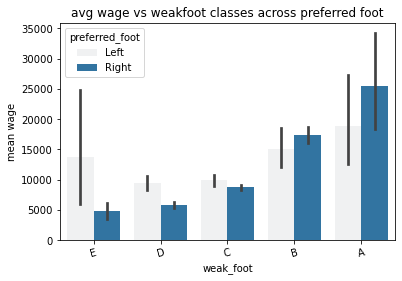

In [131]:
sb.barplot(data=df, x='weak_foot', y='wage',hue='preferred_foot', color=base_color)
plt.xticks(rotation=15)
plt.title('avg wage vs weakfoot classes across preferred foot')
plt.ylabel('mean wage')

*interestingly in low classes of weakfoot the players preferred left foot get higher wags in average than player preferred right foot, but in high class week foot player preferred right foot get in average higher than player preferred left foot*

*i think in low class weak foot left leg player highly skilled than right foot player,but in high class weak foot the player can play with both of his legs, and that's makes the relation reasonable*

*next i'll try to supposrt that hypothesis*

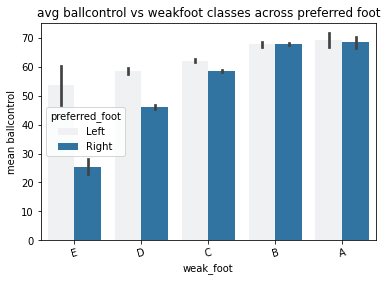

In [92]:
sb.barplot(data=df, x='weak_foot', y='ballcontrol' ,hue='preferred_foot', color=base_color)
plt.xticks(rotation=15);
plt.title('avg ballcontrol vs weakfoot classes across preferred foot')
plt.ylabel('mean ballcontrol');

*as we found ball control have ,in average, the strongest correlation with other featuer, for players who preferred left foot have higher ball control in low classe of weak foot but in high classes of weak foot the difference in avg ball control between preferred right and preferred left become inconsiderable,and that's support the previous hypothesis*

*i'll investigate the preferred foot influence among weak foot classess in shot power to assure the relation*

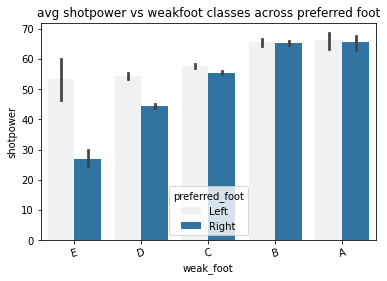

In [93]:
sb.barplot(data=df, x='weak_foot', y='shotpower',hue='preferred_foot', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('shotpower')
plt.title('avg shotpower vs weakfoot classes across preferred foot');

the preferred left foot again shows priority over preferred right foot in low classes of week foot ,let's consider preferred foot influence on wage overall relation 

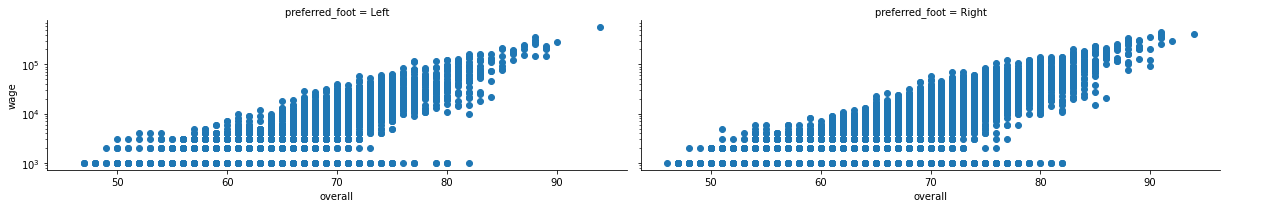

In [94]:
g = sb.FacetGrid(data =df,col ='preferred_foot',height = 3,aspect=3,
                margin_titles = True) 
g.map(plt.scatter, 'overall', 'wage')
plt.yscale('log')
g.add_legend();

*the relation between wage and overall is the same for both right and left foot*

*i'll consider the relation between postions and avg wage separated by preferred foot*

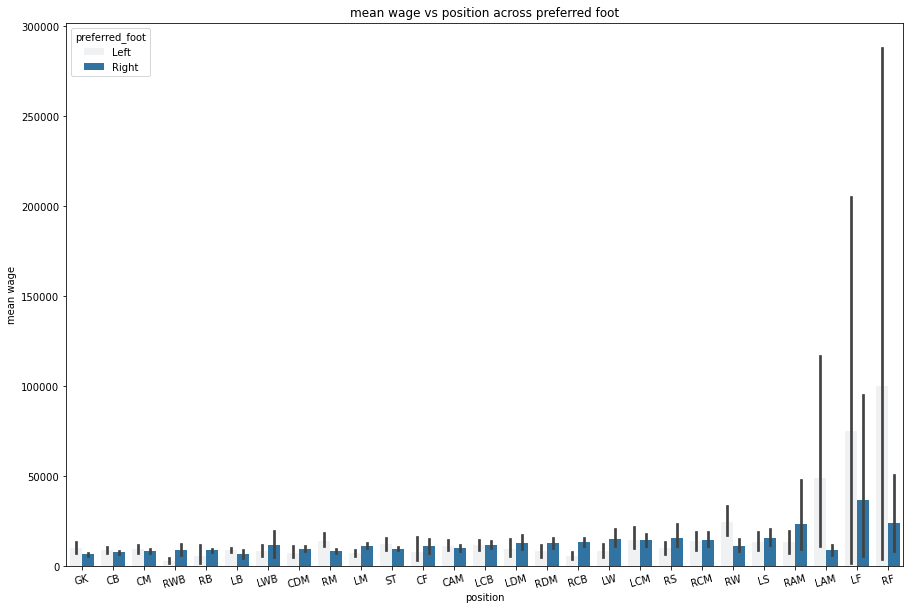

In [95]:
type_counts=df.groupby(['position'])['wage'].mean().sort_values()
type_order=type_counts.index
plt.figure(figsize=[15,10])
sb.barplot(data=df, x='position', y='wage',hue='preferred_foot',color=base_color,order=type_order)
plt.xticks(rotation=15);
plt.title('mean wage vs position across preferred foot')
plt.ylabel('mean wage');

interestingly left foot again shows huge priority  over right foot in in  the top 3 rarest  positions in dataset, but the case have few players in those position to make it a role,although it may be reasonable while the left foot frequency arround 30% of right foot frequency, and position frequency shows us considrable  frequency impact on wage in football world
something also interesting, for back positions right foot get higher wage in avg in right position like(RB,RWB,RCB),but in wing positions left foot get avg higher wage in left position(RW), and right foot get avg higher wage in left position(LW)

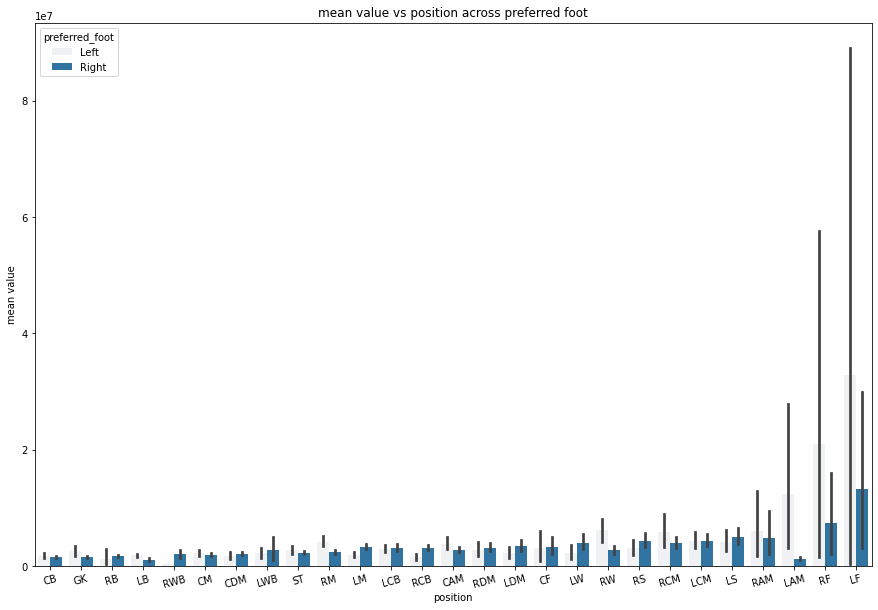

In [91]:
type_counts=df.groupby(['position'])['value'].mean().sort_values()
type_order=type_counts.index
plt.figure(figsize=[15,10])
sb.barplot(data=df, x='position', y='value',hue='preferred_foot',color=base_color,order=type_order)
plt.xticks(rotation=15);
plt.title('mean value vs position across preferred foot')
plt.ylabel('mean value');

the graph shows no more than previous graph, but avg value instead of avg wage displayed,next i'll investigate position influence in wage vs value relation


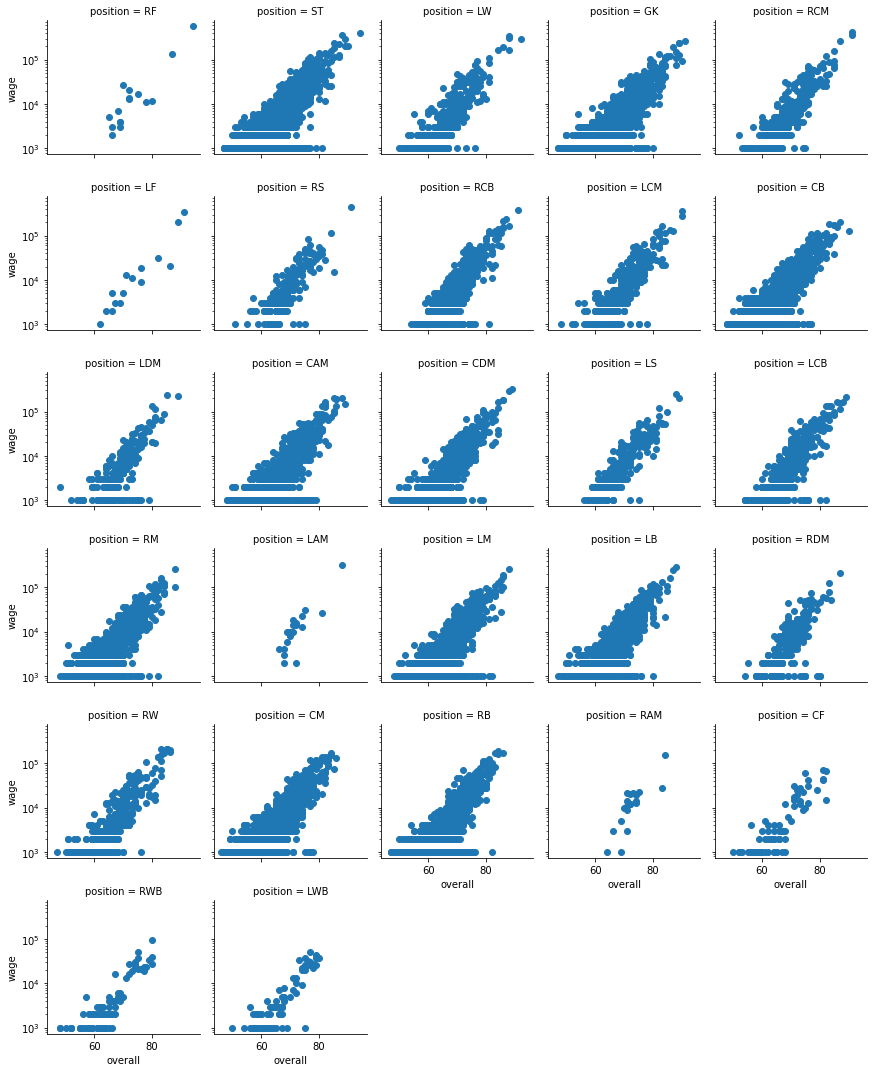

In [96]:
g = sb.FacetGrid(data =df, col= 'position',col_wrap = 5,height = 2.5,
                margin_titles = True) 
g.map(plt.scatter, 'overall', 'wage')
plt.yscale('log')
g.add_legend();

interesingly ,the pattern of relation between wages and other feature specifically overall value emerged in most of position, but in rare positions like (LF,RF,LAM,RAM) the relation with wage become more linear,and it's expected to be the case in other features

*next i'll investigate the ordinal values(skill_moves and international_reputation) and the there relation with each other and there influence on player wage

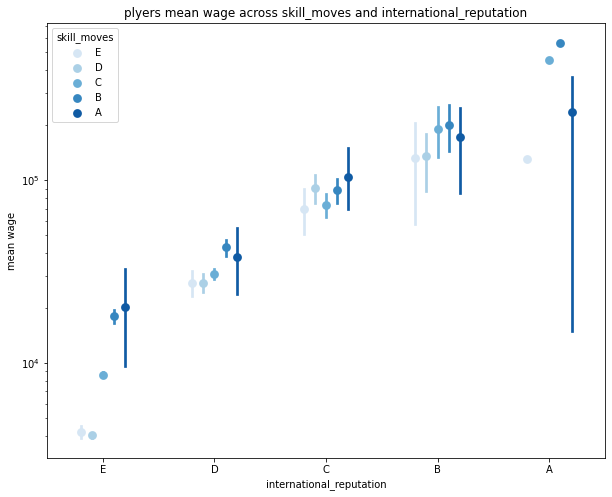

In [97]:
plt.figure(figsize=[10,8])
sb.pointplot(data = df, x = 'international_reputation', y = 'wage', hue = 'skill_moves',linestyles = '',dodge = 0.4,palette = 'Blues')
plt.title("plyers mean wage across skill_moves and international_reputation")
plt.ylabel("mean wage")
plt.yscale('log');


*mean wage is increases with international reputation that's clear and expected, also at the same reputation class wage increases by skill moves class*
*but in the high reputation class (A and B) the highest mean wage don't go to highest skill move class* 
*it may be interprrted by the players that have highest class in reputation and highest skill move younger than player in the same reputation class and get lower wags* 
>i expected in high reputation classes the wages affected by age more than skills

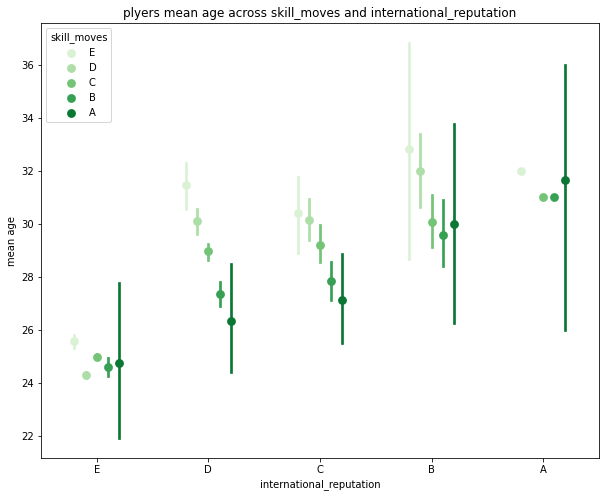

In [98]:
#type_counts=df.groupby(['position'])['wage'].mean().sort_values()
#type_order=type_counts.index
plt.figure(figsize=[10,8])
sb.pointplot(data = df, x = 'international_reputation', y = 'age', hue = 'skill_moves',linestyles = '',dodge = 0.4,palette = 'Greens')
plt.title("plyers mean age across skill_moves and international_reputation")
plt.ylabel("mean age");



*lowe class skill moves have high mean age and vice versa, but it's not the case in reputation class A, mean age of players have high skill move class A  relatively higher than playesrs have skill move class B and C*
>some players in reputation Class A  have a speciall case relation with skill moves vs mean ag

*next i'll investigate age impact on reputation at skill move classes*

Text(0, 0.5, 'mean age')

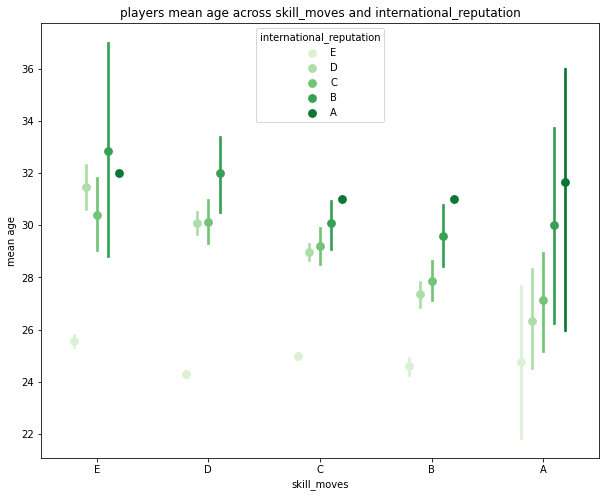

In [88]:
#type_counts=df.groupby(['position'])['wage'].mean().sort_values()
#type_order=type_counts.index
plt.figure(figsize=[10,8])
sb.pointplot(data = df, x = 'skill_moves', y = 'age', hue = 'international_reputation',linestyles = '',dodge = 0.4,palette = 'Greens')
plt.title("players mean age across skill_moves and international_reputation")
plt.ylabel("mean age")



interesting plot  shows that reputation classes  have a strong relation with age, in same skill moves younger players tend to get low reputation class even with high skill moves ,and old players get high international reputation class

*the variance of skill moves among mean age are quite interesting, many older players have higher skillmoves than younger players*

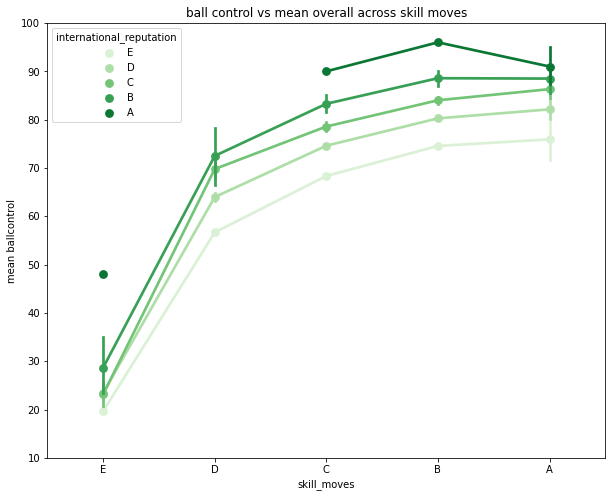

In [99]:
plt.figure(figsize=[10,8])
sb.pointplot(data = df, x = 'skill_moves', y = 'ballcontrol',hue='international_reputation' ,palette = 'Greens')
plt.title("ball control vs mean overall across skill moves")
yticks=[10,20,30,40,50,60,70,80,90,100]
plt.yticks(yticks,yticks)
plt.ylabel("mean ballcontrol");


*skill moves have clear positive  relation with ball control subsequently have positive realtion with other skills*

*also the increase in ball control confront an increase in player international reputation*

>i choose ball control because it's have highest mean correlation with all of other skill features, so it's the best indicator for other skills 


*the relation between wage and other feature tend to be more positive under conditions, position rarity, international reputation and skillmoves*  

*the players that preferred left foot tend to have higher features and higher wage in many cases*
*skill moves have huge impact on ball control, *

> interestingly the old players in reputation class A  get higher wags than younger players even if the old player have lower skill move

In [66]:
df.to_csv('fifa19_wr.csv',index = False)